**Assignment 1**


Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.shape

(200000, 9)

In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.dropna(inplace =True)

In [12]:
df.drop("Unnamed: 0",inplace = True,axis = 1)

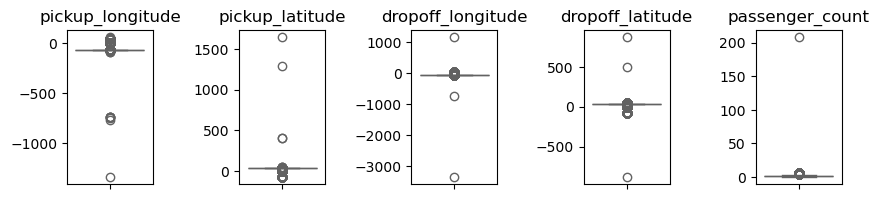

In [13]:
fig , ax = plt.subplots(1,5,figsize=(10,2))
plt.subplots_adjust(wspace = 1)

columns = ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

for i,col in enumerate(columns):
    sns.boxplot(ax = ax[i],y = df[col].values,color = "tomato")
    ax[i].set_title(col)
plt.show()

In [14]:
df2 = df.drop(["key","pickup_datetime"],axis = 1)
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1
outliers = ((df2 < (q1 - 1.5*iqr)) | (df2 > (q3 + 1.5*iqr)))
outliers_count = outliers.sum()
print("Number of outliers of each column : ",outliers_count)

Number of outliers of each column :  fare_amount          17166
pickup_longitude     13559
pickup_latitude       9423
dropoff_longitude    14200
dropoff_latitude     12145
passenger_count      22557
dtype: int64


In [15]:
df2 = df2.astype("float")
df2.where(~outliers,df2.mean(),inplace = True,axis=1)

In [16]:
df2["key"] = df.key
df2["pickup_datetime"] = df.pickup_datetime
df = df2
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,key,pickup_datetime
0,7.500000,-73.999817,40.738354,-73.999512,40.723217,1.000000,2015-05-07 19:52:06.0000003,2015-05-07 19:52:06 UTC
1,7.700000,-73.994355,40.728225,-73.994710,40.750325,1.000000,2009-07-17 20:04:56.0000002,2009-07-17 20:04:56 UTC
2,12.900000,-74.005043,40.740770,-73.962565,40.772647,1.000000,2009-08-24 21:45:00.00000061,2009-08-24 21:45:00 UTC
3,5.300000,-73.976124,40.790844,-73.965316,40.803349,3.000000,2009-06-26 08:22:21.0000001,2009-06-26 08:22:21 UTC
4,16.000000,-72.527631,40.744085,-73.973082,40.761247,1.684543,2014-08-28 17:47:00.000000188,2014-08-28 17:47:00 UTC
...,...,...,...,...,...,...,...,...
199995,3.000000,-73.987042,40.739367,-73.986525,40.740297,1.000000,2012-10-28 10:49:00.00000053,2012-10-28 10:49:00 UTC
199996,7.500000,-73.984722,40.736837,-74.006672,40.739620,1.000000,2014-03-14 01:09:00.0000008,2014-03-14 01:09:00 UTC
199997,11.359892,-73.986017,40.756487,-72.525292,40.692588,2.000000,2009-06-29 00:42:00.00000078,2009-06-29 00:42:00 UTC
199998,14.500000,-73.997124,40.725452,-73.983215,40.695415,1.000000,2015-05-20 14:56:25.0000004,2015-05-20 14:56:25 UTC


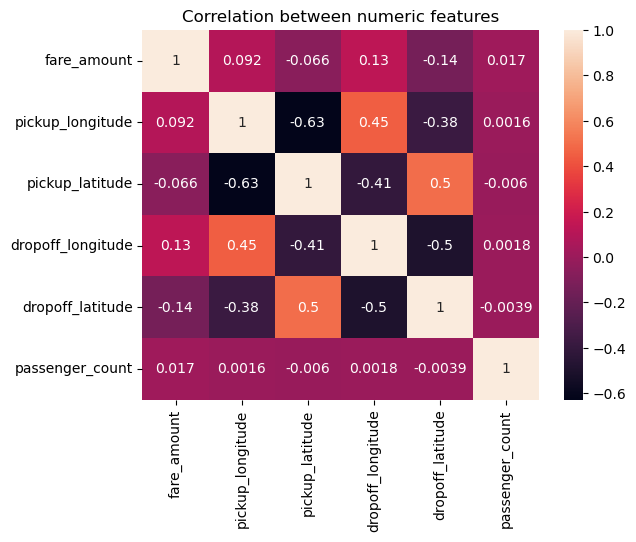

In [17]:
numeric_df = df.select_dtypes(include = ["number"])
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation between numeric features")
plt.show()

In [18]:
R = 6371
df["Distance"] = 2 * R * np.arcsin(
    np.sqrt(
        (np.sin(np.radians(df["pickup_latitude"] - df["dropoff_latitude"])/2)) **2 +
        np.cos(np.radians(df["pickup_latitude"])) * np.cos(np.radians(df["dropoff_latitude"])) *
        (np.sin(np.radians(df["pickup_longitude"] - df["dropoff_longitude"])/2)) **2 
    )
)

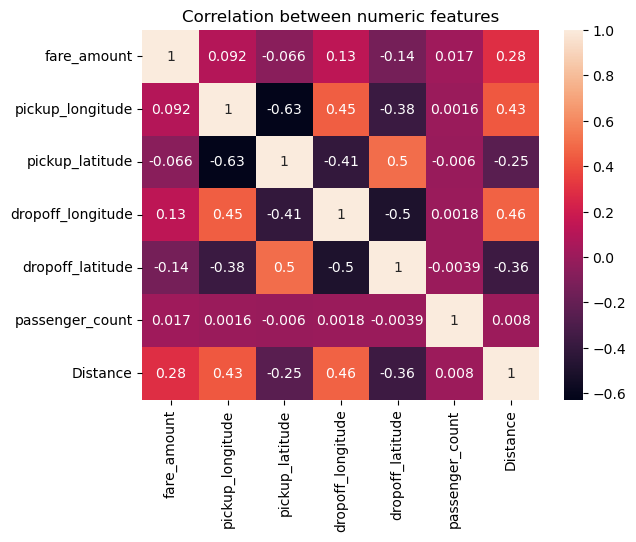

In [19]:
numeric_df = df.select_dtypes(include = ["number"])
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation between numeric features")
plt.show()

In [20]:
train,test = train_test_split(df,test_size = 0.3,random_state =0)
x_train , y_train = train.drop(["key","pickup_datetime","fare_amount"],axis = 1).values ,train["fare_amount"].values
x_test , y_test = test.drop(["key","pickup_datetime","fare_amount"],axis = 1).values ,test["fare_amount"].values

In [21]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred_lr = lr.predict(x_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
mse = mean_squared_error(y_test,y_pred_lr)
mae = mean_absolute_error(y_test,y_pred_lr)
r2 = r2_score(y_test,y_pred_lr)
print("Root Mean Square Error : ",rmse)
print("Mean Square Error : ",mse)
print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Root Mean Square Error :  3.8458289396480865
Mean Square Error :  14.790400233034726
Mean Absolute Error :  3.025112950732754
R2 Score :  0.08503569333368155


Text(0.5, 1.0, 'Actual vs Predicted (Linear Regression)')

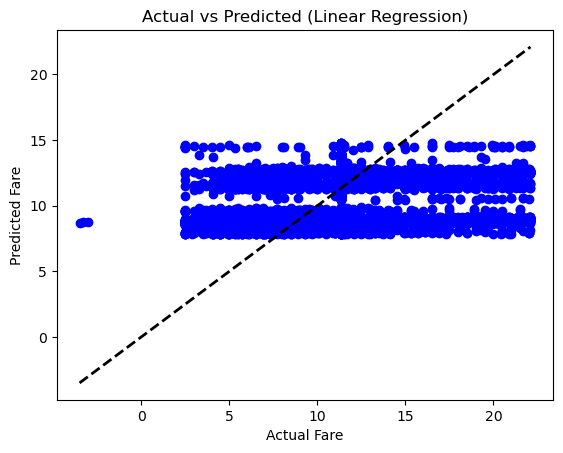

In [26]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.scatter(y_test, y_pred_lr,  color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted (Linear Regression)')

In [27]:
rf= RandomForestRegressor()

In [28]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
y_pred_rf = rf.predict(x_test)

In [30]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
mse = mean_squared_error(y_test,y_pred_rf)
mae = mean_absolute_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)
print("Root Mean Square Error : ",rmse)
print("Mean Square Error : ",mse)
print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Root Mean Square Error :  2.3781414049992198
Mean Square Error :  5.655556542171664
Mean Absolute Error :  1.651006804398302
R2 Score :  0.6501357442063949


Text(0.5, 1.0, 'Actual vs Predicted (Random forest)')

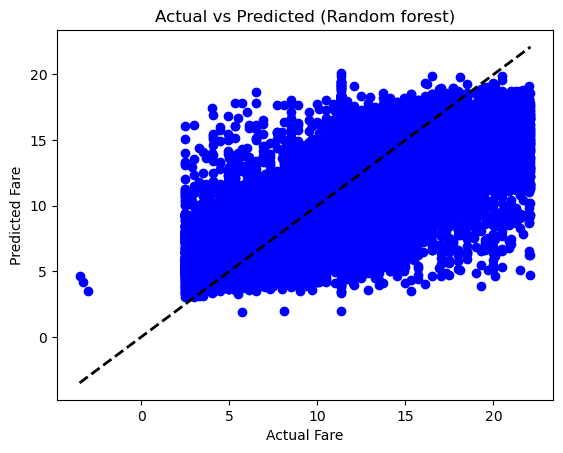

In [31]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.scatter(y_test, y_pred_rf,  color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted (Random forest)')